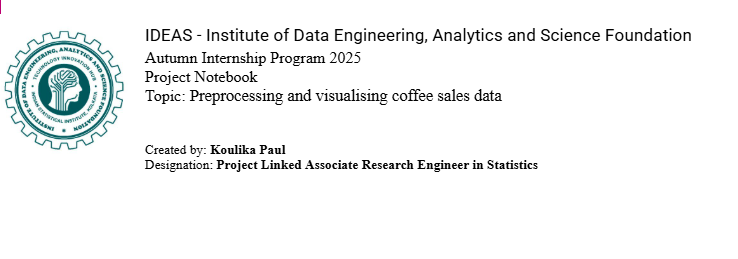

# **ARITRA BHATTACHARYA, AUTUMN INTERNSHIP, IDEAS-TIH, 2025**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
coffee_data=pd.read_csv("/content/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [132]:
coffee_data.info()

#Finding the number of columns

column_number = len(coffee_data.columns)
print(f"\nThe number of columns are {column_number}")
print(f"The name of columns are {coffee_data.columns.values}")

# Finding the duplicate columns
duplicate_column_names = coffee_data.columns.duplicated()
print(f"Boolean Series for duplicate column names:\n{duplicate_column_names}")
number_of_duplicate_names = duplicate_column_names.sum() #to find the number of duplicate columns
print(f"\nNumber of duplicate column names: {number_of_duplicate_names}")

#Finding the missing values
missing_values = coffee_data.isnull().sum()
print("Missing values per column:\n", missing_values) # this gives the number of missing values per column.
total_missing_values = coffee_data.isnull().sum().sum()
print("\nTotal missing values in the DataFrame:", total_missing_values) #number of total missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
 11  Month        3547 non-null   int32         
 12  Year         3547 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(6)
memory usage: 346.5+ KB

The number of columns are 13
The name of columns are ['hour_of_d

***Basic statistics of the data***

In [9]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [10]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [11]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [12]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7bc4fb76c9a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [35]:
print(f"The datatype of the grouped_data is = {grouped_data.dtypes}")

The datatype of the grouped_data is = float64


Hence, the datatype of the grouped_data is float (float64)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Q3. Find the maximum money for each month**

In [34]:
monthly_data=coffee_data.groupby('Month_name')['money'].agg(np.max)
monthly_data

#Hence, it summarizes the maximum money for each month in the order of the months having the highest average to lowest.

/tmp/ipython-input-2961837974.py:1: FutureWarning: The provided callable <function max at 0x7bc4fb74bf60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  monthly_data=coffee_data.groupby('Month_name')['money'].agg(np.max)


,money
Month_name,
Apr,38.70
Aug,32.82
Dec,35.76
Feb,35.76
Jan,35.76
Jul,37.72
Jun,37.72
Mar,38.70
May,37.72


***Distribution of money over months***

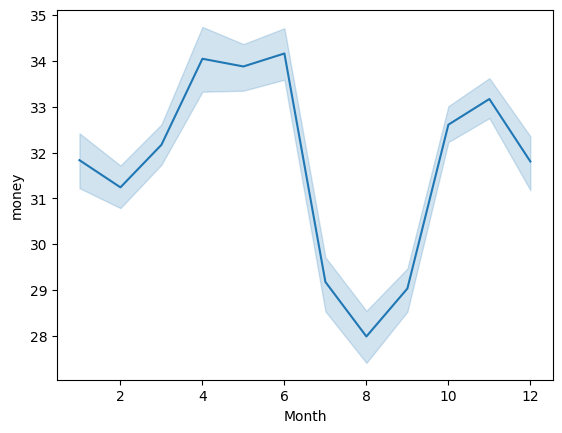

In [15]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

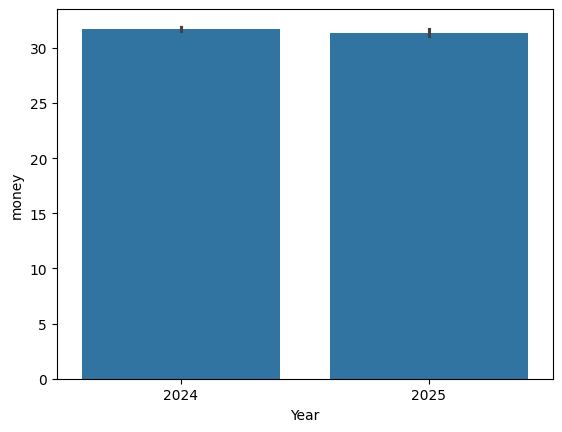

In [16]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


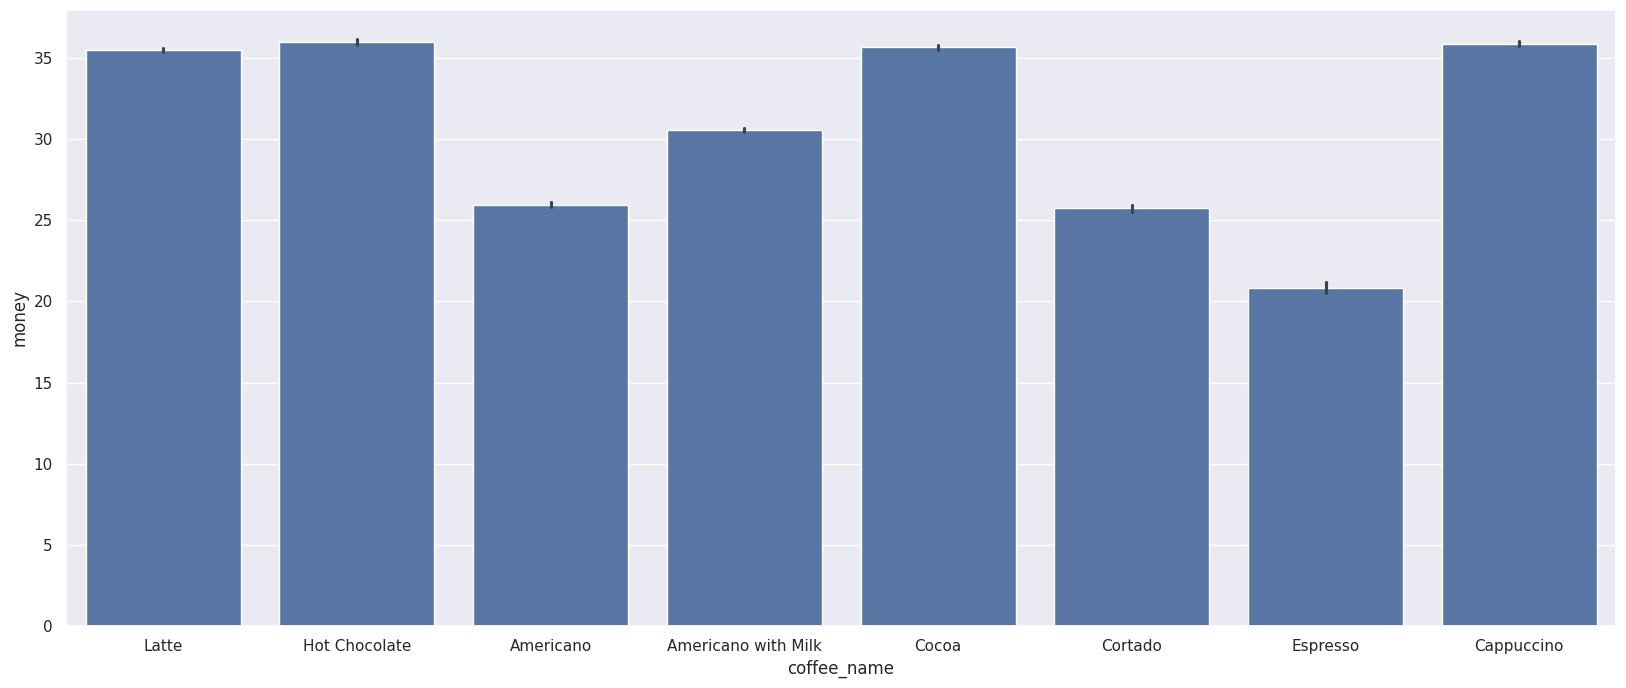

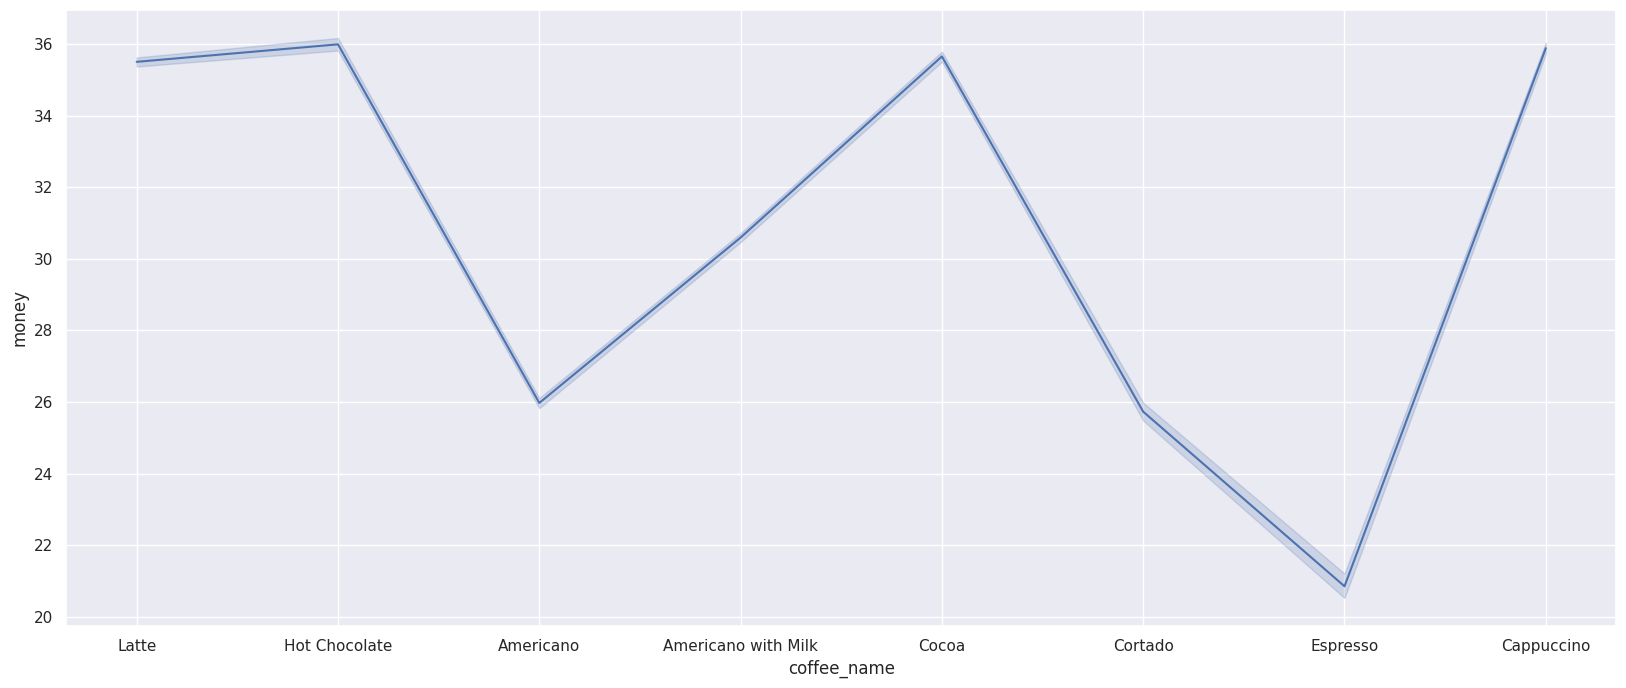

In [33]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)}) #This function is applied to increase the plot sizes to prevent the plot look crowded.


sns.barplot(x=coffee_data['coffee_name'],y='money',data=coffee_data)
plt.show()
sns.lineplot(x=coffee_data['coffee_name'],y='money',data=coffee_data)
plt.show()

#Hence, we get the distribution of money over coffee names in the form of both barplot and lineplot.


***Times of the Day the dataset holds***

In [25]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [31]:
coffee_data['coffee_name'].value_counts()

#Hence, we get the unique types of coffee in the dataset, with their counts.

,count
coffee_name,
Americano with Milk,809
Latte,757
Americano,564
Cappuccino,486
Cortado,287
Hot Chocolate,276
Cocoa,239
Espresso,129


***Max money from coffee_name***

In [27]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [28]:
coffee_data.groupby('Time_of_Day')['money'].agg(np.average)

,money
Time_of_Day,
Afternoon,31.643187
Morning,30.422693
Night,32.890904


***Generate 100 synthetic data rows***

In [29]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,0.555838
1,2023-01-02,0.913537
2,2023-01-03,2.283656
3,2023-01-04,2.598062
4,2023-01-05,2.970788
...,...,...
95,2023-04-06,-2.847708
96,2023-04-07,-2.211213
97,2023-04-08,-1.956693
98,2023-04-09,-3.305792


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [121]:
# New date rows
date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")

# New hour rows
y = list(coffee_data['Time'].unique())
time = np.random.choice(y,100)

# New month rows
import calendar
import random
month_name = calendar.month_abbr[random_month]

# New rows of coffee names
x = list(coffee_data['coffee_name'].unique())
random_coffee = np.random.choice(x,100)

# New money-amount rows

df1 = list(coffee_data['money'].unique())
money = np.random.choice(df1,100)

# New rows of weekdays
df2 = list(coffee_data['Weekday'].unique())
week = np.random.choice(df2,100)

# New rows of cash types

df3 = list(coffee_data['cash_type'].unique())
cash = np.random.choice(df3,100)

# New rows of hour of the day

df4 = list(coffee_data['hour_of_day'].unique())
hour = np.random.choice(df4,100)

# New rows of the cash type

df5 = list(coffee_data['Time_of_Day'].unique())
daytime = np.random.choice(df5,100)

# Taking the whole together - creating a new synthetic dataset
df = pd.DataFrame({"Date": date_range, "Time": time, "Month_name":month_name, "money":money, "coffee_name":random_coffee, "Weekday":week, "cash_type":cash,
                   "hour_of_day":hour, "Time_of_Day":daytime})
df


#Final command - Insterting the new synthetic dataset into the original coffee_data dataset -

new_dataset = pd.concat([coffee_data,df],ignore_index=True)
new_dataset


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Month,Year
0,10,card,38.70,Latte,Morning,Fri,Mar,5.0,3.0,2024-03-01,10:15:50.520000,3.0,2024.0
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5.0,3.0,2024-03-01,12:19:22.539000,3.0,2024.0
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5.0,3.0,2024-03-01,12:20:18.089000,3.0,2024.0
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5.0,3.0,2024-03-01,13:46:33.006000,3.0,2024.0
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5.0,3.0,2024-03-01,13:48:14.626000,3.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,9,card,25.96,Hot Chocolate,Morning,Fri,Feb,NaN,NaN,2023-04-06,11:50:54.603000,NaN,NaN
3643,8,card,18.12,Americano with Milk,Afternoon,Fri,Feb,NaN,NaN,2023-04-07,15:55:40.848000,NaN,NaN
3644,12,card,38.70,Espresso,Afternoon,Mon,Feb,NaN,NaN,2023-04-08,15:24:06.221000,NaN,NaN
3645,10,card,21.06,Cortado,Afternoon,Sun,Feb,NaN,NaN,2023-04-09,15:32:35.390000,NaN,NaN


### **NOW, ANALYZATION OF THE NEW COMBINED DATASET**

# Question - 1

In [131]:
#Finding the number of columns
column_number = len(new_dataset.columns)
print(f"The number of columns are {column_number}")
print(f"The name of columns are {new_dataset.columns.values}")

# Finding the duplicate columns
duplicate_column_names = new_dataset.columns.duplicated()
print(f"Boolean Series for duplicate column names:\n{duplicate_column_names}")
number_of_duplicate_names = duplicate_column_names.sum() #to find the number of duplicate columns
print(f"\nNumber of duplicate column names: {number_of_duplicate_names}")

#Finding the missing values
missing_values = new_dataset.isnull().sum()
print("Missing values per column:\n", missing_values) # this gives the number of missing values per column.
total_missing_values = new_dataset.isnull().sum().sum()
print("\nTotal missing values in the DataFrame:", total_missing_values) #number of total missing values in the dataset


The number of columns are 13
The name of columns are ['hour_of_day' 'cash_type' 'money' 'coffee_name' 'Time_of_Day' 'Weekday'
 'Month_name' 'Weekdaysort' 'Monthsort' 'Date' 'Time' 'Month' 'Year']
Boolean Series for duplicate column names:
[False False False False False False False False False False False False
 False]

Number of duplicate column names: 0
Missing values per column:
 hour_of_day      0
cash_type        0
money            0
coffee_name      0
Time_of_Day      0
Weekday          0
Month_name       0
Weekdaysort    100
Monthsort      100
Date             0
Time             0
Month          100
Year           100
dtype: int64

Total missing values in the DataFrame: 400


# Question 2

In [134]:
#Finding the datatype of the new dataset

new_dataset.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,float64
Monthsort,float64
Date,datetime64[ns]


# Question 3

In [135]:
#Finding the maximum money for each month

monthly_data=new_dataset.groupby('Month_name')['money'].agg(np.max)
monthly_data

#Hence, it summarizes the maximum money for each month in the order of the months having the highest average to lowest.

/tmp/ipython-input-772752382.py:1: FutureWarning: The provided callable <function max at 0x7bc4fb74bf60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  monthly_data=new_dataset.groupby('Month_name')['money'].agg(np.max)


,money
Month_name,
Apr,38.70
Aug,32.82
Dec,35.76
Feb,38.70
Jan,35.76
Jul,37.72
Jun,37.72
Mar,38.70
May,37.72


# Question 4

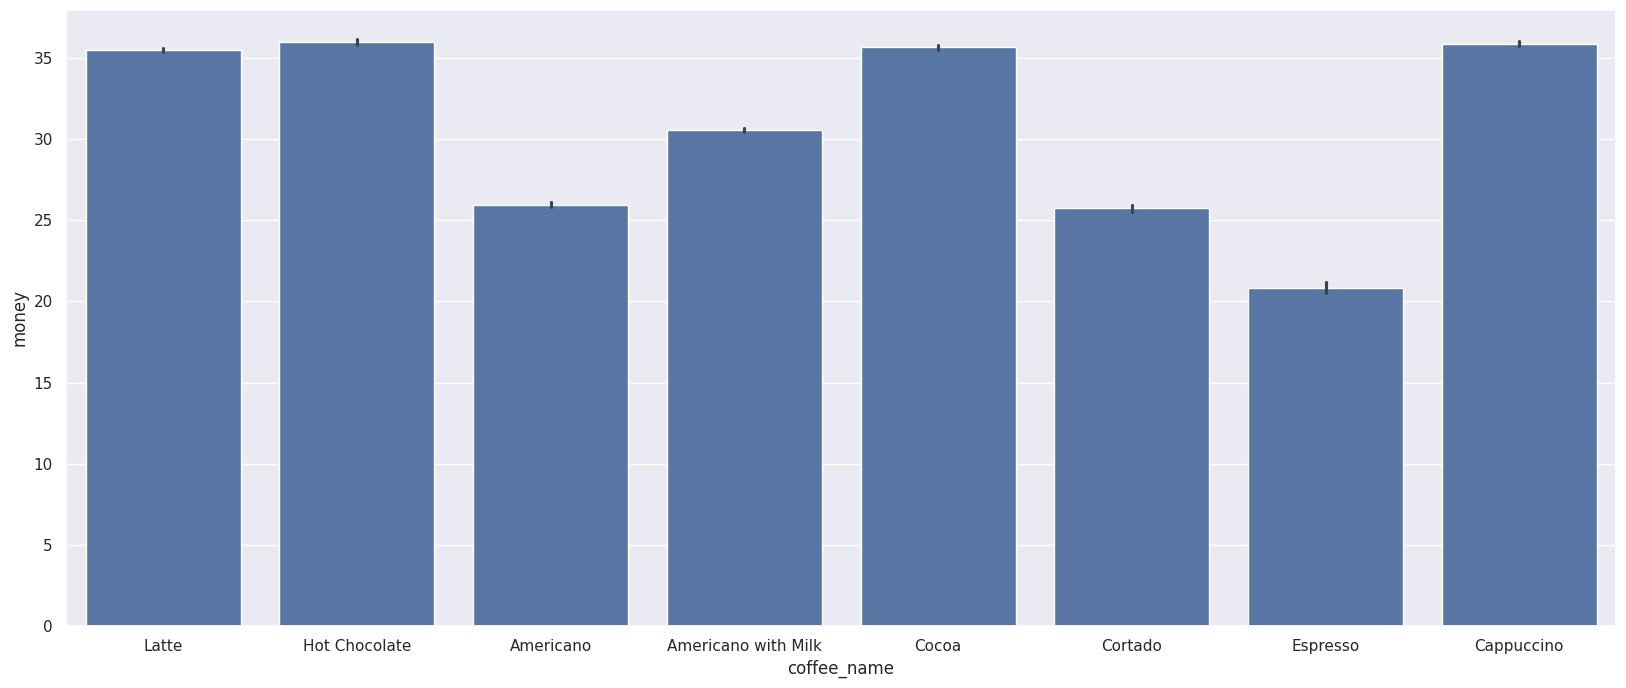

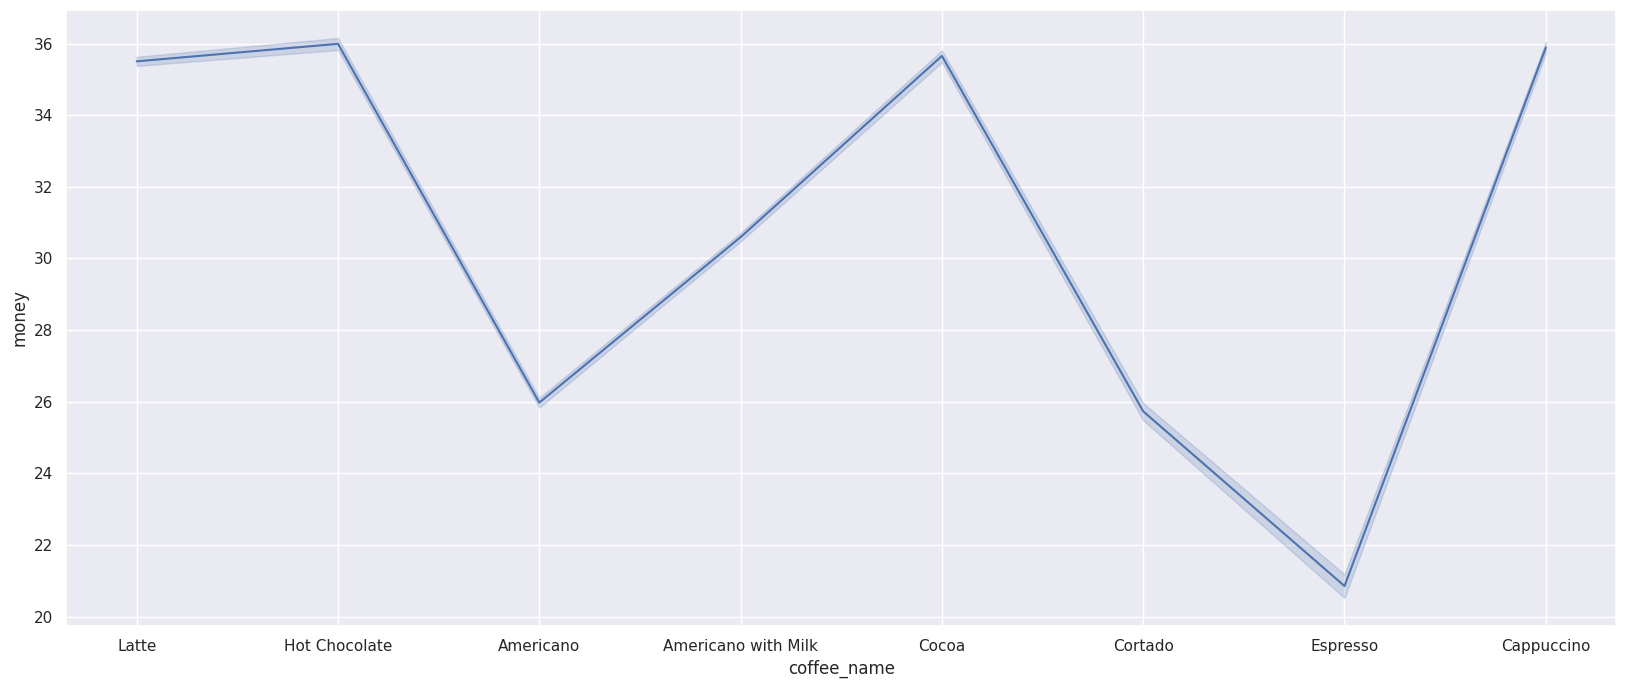

In [136]:
#Finding thew distribution of money over coffee names

width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)}) #This function is applied to increase the plot sizes to prevent the plot look crowded.


sns.barplot(x=new_dataset['coffee_name'],y='money',data=coffee_data)
plt.show()
sns.lineplot(x=new_dataset['coffee_name'],y='money',data=coffee_data)
plt.show()

#Hence, we get the distribution of money over coffee names in the form of both barplot and lineplot.

# Question 5

In [137]:
# Coffee types present in the dataset with their respective values

new_dataset['coffee_name'].value_counts()


,count
coffee_name,
Americano with Milk,819
Latte,770
Americano,574
Cappuccino,500
Cortado,301
Hot Chocolate,292
Cocoa,251
Espresso,140


# Question 6

In [138]:
# Finding the average money made at what time of the day

new_dataset.groupby('Time_of_Day')['money'].agg(np.average)

,money
Time_of_Day,
Afternoon,31.555356
Morning,30.425782
Night,32.801059
